# CS524 - Homework 6

## Question 1a

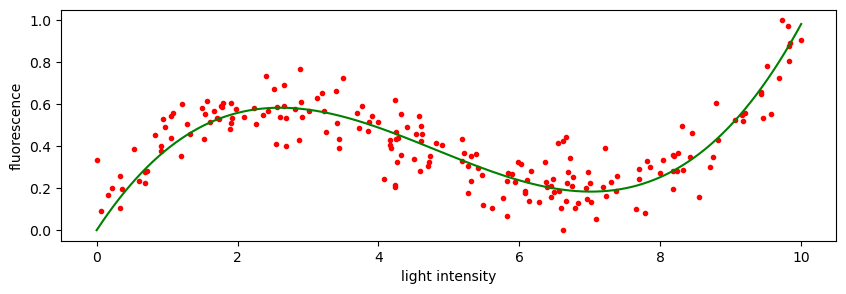

In [9]:
using PyPlot
using DelimitedFiles

data = readdlm("xy_data.csv", ',')
x_data = data[:,1]
y_data = data[:,2]

# first we need to be able to plot the data
function plot_graph()
    figure(figsize=(10,3))
    plot(x_data, y_data, "r.")
    xlabel("light intensity")
    ylabel("fluorescence")
end

A = [x_data.^3 x_data.^2 x_data] # to represent a1x^3 + a2x^2 + a3x + a4
c = A\y_data # find coefficients

plot_graph()
xvals = range(0,10,1000)
yvals = c[1]*xvals.^3 + c[2]*xvals.^2 + c[3]*xvals
plot(xvals,yvals,"g");

## Question 1b

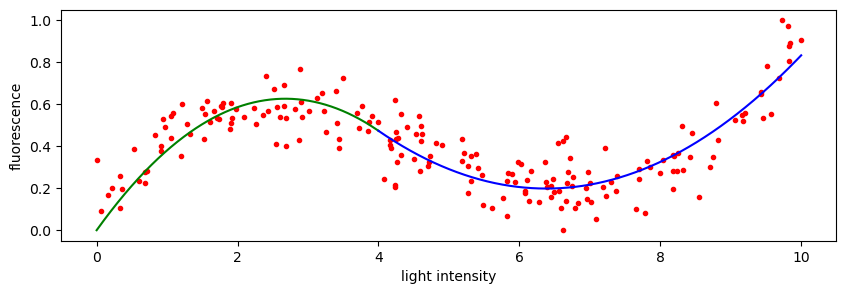

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 3 rows, 6 columns and 11 nonzeros
Model fingerprint: 0x1915a413
Model has 9 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [9e+01, 5e+03]
  QObjective range [2e+02, 7e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 2 rows, 5 columns, 9 nonzeros
Presolved model has 9 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 8
 AA' NZ     : 8.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 5.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
  

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002310A00>

In [63]:
using JuMP, Gurobi
using PyPlot

x_low = x_data[findall(x_data .< 4)]
y_low = y_data[findall(x_data .< 4)]

x_high = x_data[findall(x_data .>= 4)]
y_high = y_data[findall(x_data .>= 4)]

m_spline = Model(with_optimizer(Gurobi.Optimizer))

@variable(m_spline,p[1:3])
@variable(m_spline,q[1:3])

@constraint(m_spline, p[3] == 0) # there is zero fluorescence when the intensity is zero.
@constraint(m_spline, 16*p[1] + 4*p[2] + p[3] == 16*q[1] + 4*q[2] + q[3]) # quadratics match at x = 4
@constraint(m_spline, 8*p[1] + p[2] == 8*q[1] + q[2]) # slopes match at x = 4

# residuals
@expression(m_spline, first, p[1]*x_low.^2 + p[2]*x_low - y_low)
@expression(m_spline, second, q[1]*x_high.^2 + q[2]*x_high .+ q[3] - y_high)

@objective(m_spline, Min, sum(first.^2) + sum(second.^2))

optimize!(m_spline)

x_first = range(0,4,1000)
p_vals = value.(p)
y_first = p_vals[1]*x_first.^2 + p_vals[2]*x_first .+ p_vals[3]

x_second = range(4,10,1000)
q_vals = value.(q)
y_second = q_vals[1]*x_second.^2 + q_vals[2]*x_second .+ q_vals[3]

plot_graph()
plot(x_first, y_first, "g-")
plot(x_second, y_second, "b-")

## Question 2

In [30]:
using PyPlot
using DelimitedFiles
using JuMP, Gurobi

voltage_data = readdlm("voltages.csv")
len = length(voltage_data)

constants = [0.25, 1, 4]

m_volt1 = Model(with_optimizer(Gurobi.Optimizer))
@variable(m_volt1, v1[1:len])
@expression(m_volt1, least_squares, sum((voltage_data[i] - v1[i])^2 for i = 1:len))
@expression(m_volt1, smoothness, sum((v1[i+1] - v1[i])^2 for i = 1:len-1))
@objective(m_volt1, Min, least_squares + constants[1]*smoothness)
optimize!(m_volt1)
opt_vals_1 = value.(v1);

m_volt2 = Model(with_optimizer(Gurobi.Optimizer))
@variable(m_volt2, v2[1:len])
@expression(m_volt2, least_squares, sum((voltage_data[i] - v2[i])^2 for i = 1:len))
@expression(m_volt2, smoothness, sum((v2[i+1] - v2[i])^2 for i = 1:len-1))
@objective(m_volt2, Min, least_squares + constants[2]*smoothness)
optimize!(m_volt2)
opt_vals_2 = value.(v2);

m_volt3 = Model(with_optimizer(Gurobi.Optimizer))
@variable(m_volt3, v3[1:len])
@expression(m_volt3, least_squares, sum((voltage_data[i] - v3[i])^2 for i = 1:len))
@expression(m_volt3, smoothness, sum((v3[i+1] - v3[i])^2 for i = 1:len-1))
@objective(m_volt3, Min, least_squares + constants[3]*smoothness)
optimize!(m_volt3)
opt_vals_3 = value.(v3);

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-14
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 0 rows, 200 columns and 0 nonzeros
Model fingerprint: 0xd2076c8b
Model has 399 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 4e+00]
  QObjective range [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 200 columns, 0 nonzeros
Presolved model has 399 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 399
 AA' NZ     : 4.700e+02
 Factor NZ  : 2.449e+03
 Factor Ops : 3.695e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.90000000e+02  3.900000

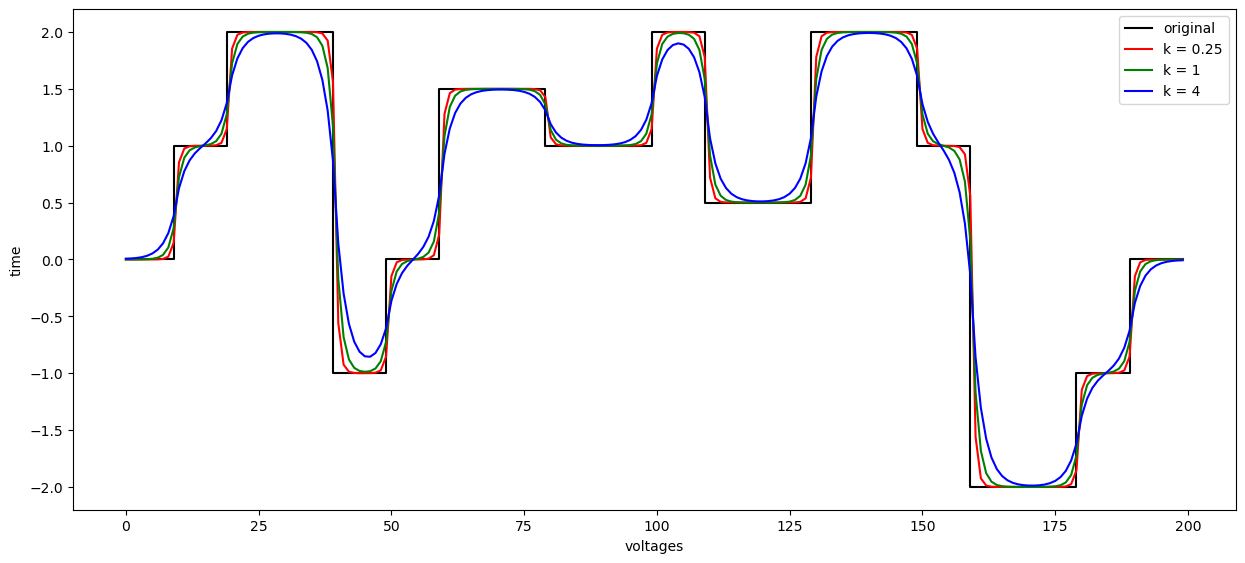

PyObject Text(24.000000000000007, 0.5, 'time')

In [31]:
figure(figsize=(15,6.5))
step(voltage_data, "k-", label="original")
plot(opt_vals_1, "r", label="k = 0.25")
plot(opt_vals_2, "g", label="k = 1")
plot(opt_vals_3, "b", label="k = 4")
legend()
xlabel("voltages")
ylabel("time")